In [1]:
include("../scripts/robot.jl")

In [2]:
mutable struct Particle
    pose
end

In [3]:
mutable struct Mcl
    particles
end

In [4]:
function Mcl_(init_pose, num)
    self = Mcl(ntuple(x->nothing, fieldcount(Mcl))...)
    self.particles =[Particle(init_pose) for i in 1:num]
    return self
end

Mcl_ (generic function with 1 method)

In [5]:
mutable struct EstimationAgent <: AbstractAgent
    nu
    omega
    estimator
end

In [6]:
function  EstimationAgent_(nu, omega,estimator)
    self = EstimationAgent(ntuple(x->nothing, fieldcount(EstimationAgent))...)
    self.nu = nu
    self.omega = omega
    self.estimator = estimator
    return self
end

EstimationAgent_ (generic function with 1 method)

In [7]:
function draw(self::EstimationAgent, ax, elems)
    elems = vcat(elems, ax.text( 0, 0, "hoge", fontsize=10))
end

draw (generic function with 6 methods)

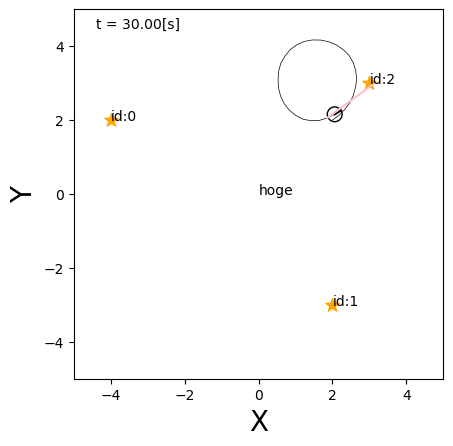

In [8]:
world = World(30, 1.0)

m = Map()
for in in [[-4.0,2.0], [2.0, -3.0], [3.0, 3.0]]
    append_landmark(m, Landmark(in))
end
append(world, m)

initial_pose = [2.0, 2.0, pi/6]
estimator = Mcl_(initial_pose, 100)
circling = EstimationAgent_(0.2, 10.0/180*pi, estimator)
r = Robot_(initial_pose, sensor=Camera_(m), agent=circling)
append(world, r)

draw(world)

In [9]:
showanim("test.mp4")

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAVqdtZGF0AAACoAYF//+c3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1NyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTggLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAFSZliIQAF//+99S3zLLtU2+2C6j3op4mX0N1JQGblsTtOoAAAAMAAAMAAB68FzgCX4kK868AAAMAyoAXqEn/CmOPiA7BC5NJlvfhKIWPSXi/zA6JYDLoQAMQkginty7NGv2twoUk3+x++sOjYLO23GkLnX3zZEYn6a9vQcRQLf67K7SBvVrJ/o4DfjcfmL80ItpTpOBk9UoqIRYyXX9Jp26SG/qkhzXvDYJnUDUkXMWTV9xgIkId/B0DL63tzWtJoDT3qBLshsubVeON8CDX6ibsLgVVQ4A0D7tGbVkDzT/KsUAH7fA8ber7HvEJfThyzrLkSWNw9QjQzXk0jYHioNxDFOC0u5P/6flbarG27qxKpcR1g3jAe/uyNQkdibir9L1oZNoxCL9nTz5Do7WCxbZi9Ea0fjbwfl2o9ts0w9wdN5MJVeAjp2apf/nrOG4XqhXEOky0ViewaAExu4pV61UcgekdA1z3mTGfHUVi7lbjNjafsSusndiXhSJn8k8VhLU7uYRjxIdQ0M5ROE4eOe0Eev0A9OOL8/r81/6uO/7gObO3O8i4DkrCbv4Nutxo6cJis1qfiocy2vDpw55pxENN/mycC9FtjXR9NJukk79e1479uSzAIL15dTFJr1SI5iK5EUHwANfOTAruJu6wCsgKM3Ai8J2DZD8tP7DJdVnBrrEQzgc+lAuO578iAptsNWCPKfk9RDDQrjk/sHw4ZXwGKxmNNSfEvA13HtDf5kA1QzopeOLfpf8QOlO7xCemvMxOgGZsQOMjKSfNbWbu3gJlEHw2R6c31ZTLm1O9xVgxRap9HaM+cHS+B3Ka9nIBrRd8URXmZnmnn6jGyox4iNCMwrJw9q3AY325/6ze5SC7Q76mqk/W2DjoMsOqHHJD1HIr3/3KzKyJnKGIPuk61fYmXGMJgJ9so0WUE15TMBxdd4rAin2ub6nVOwcgAAdvximab6tjbymjssUKGeVYU1PQZ43Nk8yWVa0atTN9LUciYxAXWl/cWNdO3OLeh0E/jyowoJf3B3AMMnRO695mLj/pBASX0H7/t5d4l0xLCQjBxlUT3CimqThP/gaPRofscyotOim0ez6RJjKYdkExkbDNWNFqegX8N/NJdrhHf4bNYpJWcXLqKUNrMHhvqXZJ+SwcJ6PEdYbvwXT4T/Bh0scJK1F8o/s10XXbFYm2QqeSnDj+omr91q5Lk2iEYaWAyzKTZni2hwa3dCh8p7WyIs7v+OcVYICdDNxyEmuDbCmOeY1WcoG+twXBU04002p9KRh0VoU0/L/SMWhylxio+PSRiBi7u7fR9g7ph6pYssXkMlS9cUTaCm6Kdu47v2rQaSP78gv7PtT8O16XcBD7g2MzyIp+tdIBx9fs+W4Sgrf0Cg1W9Xid40Cil2gXmdOsxbNM1w76iipwr9KvC1A64OnGyhbCHwwrevhnewQ7mzfbtQSPMsLvWWq4kzBXY1wb/FuJ0PtwoWO1mtaYYBnMHLzcv1H6JBbPRHr9Ir6jO/fUQ2Ts1KXj0bz5YW8sHcCOExaCW+fUoHEFVjqebtwTJuGhrCbPHtNomHTQoAsbEUxl4cUc6dkGep2uevdel56sdos1phy9Z0nXwX7MMtCKqLhwg4PO/Q8q69pSIS9DiSzX6ecDiSIrwRgD3tF8lXP2MAIzlsI6zqGyyvUb5OHXIqEOIQrA/GbHD2ZfDFOm1cJ8x0XOjgpXRd2sjQeEURcBE1c5I/5nzxBWSL8o/ZVcAcyY9VE1I11/IqW5rYeTAP2C+v4blEsZuosIB8PLp90k/pHqCTw+fPbaYWQoLSY0STdTtfz3aPqxTUcALjyF7uqLMahKtf0R9XSCZWiAQFQqucNjqLBtaoM3cn0Ro5IIM4AvlB6cuKOxFuHPm7nLoaB0yFf7ozz3vACEZfqgfzxatydNHUwz9f9hrqN1f/XpOSZGrYaZU9HWwgOmi3BJfD6ShADPb6pmcADz12Osyrv9q/b9FAbVMNksEHdM1Is4QBIyDVxWKOpGKPz/ps0SiR6W1evUmoDJcR0AMLjB4iVeih/LzliFlXzl9ofKh1oJ6jQTRTeuOcO/aAtfix33/2VSm/6eSpqUYElDUBk5P1VDwsXfh9LTB1153QQWqq/2hHOvMn12MeHBVgbU6khGMaJRR4KHgMmmyKCrvzZX6lj0sqMShtvJpCW98tyMwPaVK6a7X81c73b8OuZkeub3m2dnARunzAptxPJBpFDve30+m/dJ1PyrYhMBLsQldSUqareR8Uj11xLmnRNkNCzTKRMD+dxMbAfJO3spJUxOSj3NFYIw3PGiU1BwEsz7GYiObbU1GTqR1cD3IJdbNep1EZnp3cW5QWVMHHKU90mlTbSO3/de5QKO4qv2QgazZRipVuyNDxnY6cMb+zSOaE3HUbppJNcySo1KrF1W2wjhmqS5UupphRaCM7xUnpf+DVXw7+wjwtGCoq5Gz8zSqHZK4xX8fqNaekE2cqb5QKFPhs13I1NKWCkNHXPoZQyAYNy/5ZOJLISvA8STWy+7aXGtMG5jmJUGjbB81NIaV/tBSYsSzGqrkEkst1vd3RzVO057twyzOMGvLFW201Jx7k8OcPQNrdyg/DL3a8Wd/NUtJxzjJtyoP4WqFMf2I15zyBvkQVsKNDVNcRmfxzwXgOvidcXCjWTV+Ok3hB7VIaMDywzqvKQv9Nv3QcTyN1HFngLeXflfBvkLUilZ4zRG10fyKaRUmSUwfQRzMJp/SmiZczzmYEW96pefQg5V6uO1KxPJ5k+co6XexhOexHiI+r4ug7zvNMYBurYYyvVzWr2qWgck8UBIiDIz+JRxNDOSqHTzqvV9lifYNCPjpTPrvsdzNUhB9ZLex4T4HcbsuyahWc8PExfNP3hvvJDhLW3dBIcREo7dO22srDCMH0djeuXlkjoDz1yGVRc0tkK6OlYvxSK/BAWPj9KB32boziVGJeitapkAhpfP/Z/6f06gunpwf+T